**Decision tree for weather dataset**

In [ ]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
df=pd.read_csv("/content/weather.csv")
df

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [ ]:
df.describe()

,outlook,temperature,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,high,False,yes
freq,5,6,7,8,9


In [ ]:
df.dtypes

,0
outlook,object
temperature,object
humidity,object
windy,bool
play,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['outlook']=le.fit_transform(df['outlook'])
df['temperature']=le.fit_transform(df['temperature'])
df['humidity']=le.fit_transform(df['humidity'])
df['windy']=le.fit_transform(df['windy'])
df['play']=le.fit_transform(df['play'])
df

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [ ]:
x=df.drop(['play'],axis=1)
y=df['play']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# fitting decision tree classifier
model=tree.DecisionTreeClassifier()
clf=model.fit(x_train,y_train)


In [ ]:
# predicting for test
y_pred = clf.predict(x_test)


In [ ]:
from sklearn import metrics
abs=metrics.accuracy_score(y_test,y_pred)
abs

0.6666666666666666

In [ ]:
# create dot data
dot_data=tree.export_graphviz(clf,out_file=None,filled=True,rounded=True,special_characters=True,class_names=['not_play','play'])
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<x<SUB>0</SUB> &le; 0.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = play>, fillcolor="#aad5f4"] ;\n1 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = play>, fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<x<SUB>2</SUB> &le; 0.5<br/>gini = 0.49<br/>samples = 7<br/>value = [4, 3]<br/>class = not_play>, fillcolor="#f8e0ce"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<gini = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = not_play>, fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label=<x<SUB>1</SUB> &le; 1.0<br/>gini = 0.375<br/>samples = 4<br/>value = [1, 3]<br/>class = play>, fillcolor="#7bbeee"] ;\n2 -> 4 ;\n5 [label=<x<SUB>3</SUB> &le; 0.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = not_play>, fillcolor="#ffffff"] ;\n4 

In [ ]:
# create graph from dot data
graph=pydotplus.graph_from_dot_data(dot_data)
graph

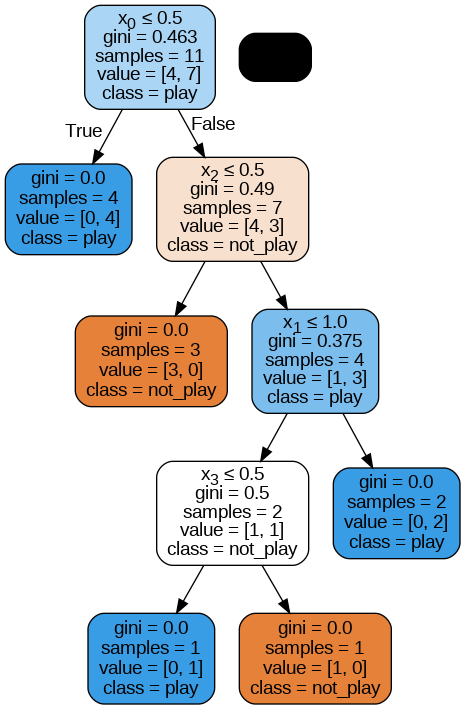

In [ ]:
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [ ]:
dot_data=tree.export_graphviz(clf,out_file=None,filled=True,rounded=True,special_characters=True,class_names=['not_play','play'])
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<x<SUB>0</SUB> &le; 0.5<br/>entropy = 0.946<br/>samples = 11<br/>value = [4, 7]<br/>class = play>, fillcolor="#aad5f4"] ;\n1 [label=<entropy = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = play>, fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<x<SUB>2</SUB> &le; 0.5<br/>entropy = 0.985<br/>samples = 7<br/>value = [4, 3]<br/>class = not_play>, fillcolor="#f8e0ce"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<entropy = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = not_play>, fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label=<x<SUB>0</SUB> &le; 1.5<br/>entropy = 0.811<br/>samples = 4<br/>value = [1, 3]<br/>class = play>, fillcolor="#7bbeee"] ;\n2 -> 4 ;\n5 [label=<entropy = 1.0<br/>samples = 2<br/>value = [1, 1]<br/>class = not_play>, fillcolor="#ffffff"] ;\n4 -> 5 ;\n

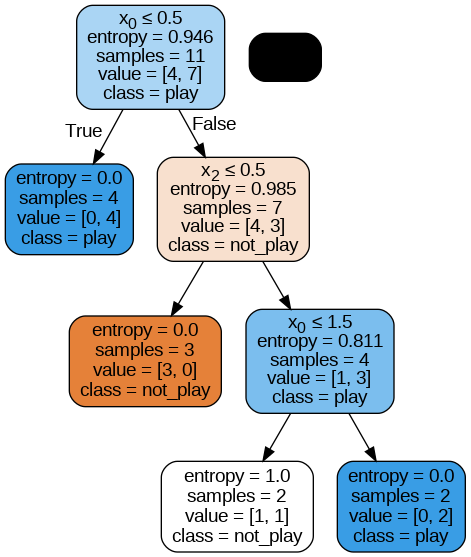

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Decision tree for purchase dataset**

In [ ]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
df=pd.read_csv("/content/Purchase_new.csv")
df

,Holiday,Discount,Free Delivery,Purchase
0,No,Yes,Yes,Yes
1,No,Yes,Yes,Yes
2,No,No,No,No
3,yes,Yes,Yes,Yes
4,yes,Yes,Yes,Yes
5,yes,No,No,No
6,yes,Yes,No,Yes
7,No,Yes,Yes,Yes
8,yes,Yes,Yes,Yes
9,yes,Yes,Yes,Yes


In [ ]:
df.count()

,0
Holiday,30
Discount,30
Free Delivery,30
Purchase,30


In [ ]:
df.shape

(30, 4)

In [ ]:
df.describe()

,Holiday,Discount,Free Delivery,Purchase
count,30,30,30,30
unique,2,2,2,2
top,yes,Yes,Yes,Yes
freq,19,20,23,24


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Holiday']=le.fit_transform(df['Holiday'])
df['Discount']=le.fit_transform(df['Discount'])
df['Free Delivery']=le.fit_transform(df['Free Delivery'])


In [ ]:
df

,Holiday,Discount,Free Delivery,Purchase
0,0,1,1,Yes
1,0,1,1,Yes
2,0,0,0,No
3,1,1,1,Yes
4,1,1,1,Yes
5,1,0,0,No
6,1,1,0,Yes
7,0,1,1,Yes
8,1,1,1,Yes
9,1,1,1,Yes


In [ ]:
x=df.drop(['Purchase'],axis=1)
y=df['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model=tree.DecisionTreeClassifier()
clf1=model.fit(x_train,y_train)
clf1

DecisionTreeClassifier()

In [ ]:
#for testing
y_pred=model.predict(x_test)

In [ ]:
from sklearn import metrics
abs=metrics.accuracy_score(y_pred,y_test)
abs

0.8333333333333334

In [ ]:
# create dot data
dot_data1=tree.export_graphviz(clf1,None,filled=True,rounded=True,special_characters=True,class_names=['no','yes'])


In [ ]:
# create graph from dot data
graph1=pydotplus.graph_from_dot_data(dot_data)
graph1

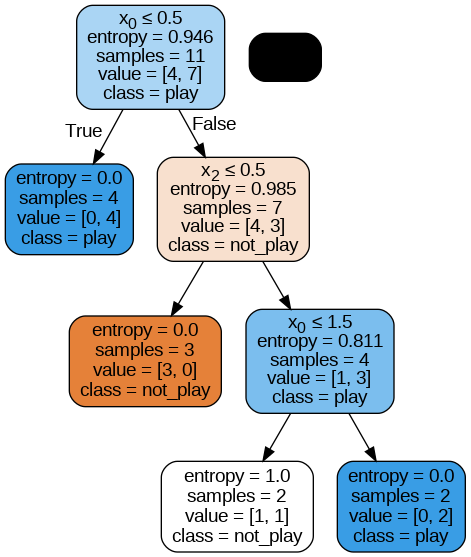

In [ ]:
Image(graph1.create_png())

In [ ]:
# Create Decision Tree classifer object
model=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf1=model.fit(x_train,y_train)
clf1
y_pred=model.predict(x_test)
abs=metrics.accuracy_score(y_pred,y_test)
abs

0.8333333333333334

In [ ]:
dot_data1=tree.export_graphviz(clf1,None,rounded=True,filled=True,special_characters=True,class_names=['no','yes'])


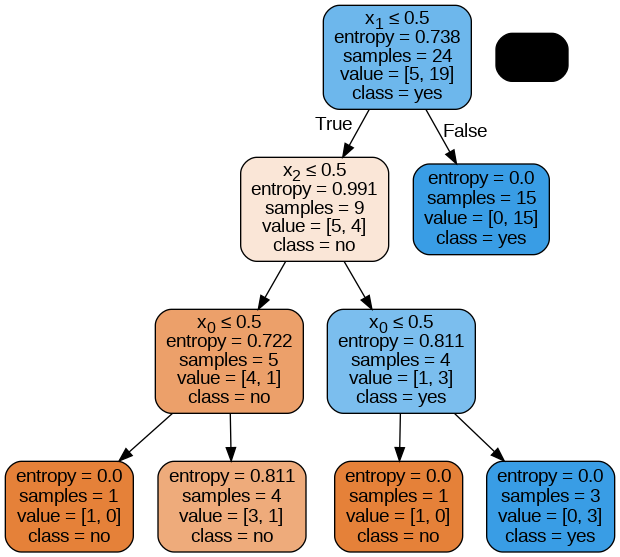

In [ ]:
graph1=pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

**Decision tree for salaries.csv dataset**

In [1]:
import pandas as pd
salary=pd.read_csv("/content/salaries.csv")
salary

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [2]:
salary.dtypes

,0
company,object
job,object
degree,object
salary_more_then_100k,int64


In [3]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary['company']=le.fit_transform(salary['company'])
salary['job']=le.fit_transform(salary['job'])
salary['degree']=le.fit_transform(salary['degree'])

In [4]:
# after label encoding the values are
salary

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [5]:
#splitting the dataset
x=salary.drop(['salary_more_then_100k'],axis=1)
y=salary['salary_more_then_100k']

In [6]:
# model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
print(x)


    company  job  degree
0         2    2       0
1         2    2       1
2         2    0       0
3         2    0       1
4         2    1       0
5         2    1       1
6         0    2       1
7         0    1       0
8         0    0       0
9         0    0       1
10        1    2       0
11        1    2       1
12        1    0       0
13        1    0       1
14        1    1       0
15        1    1       1


In [11]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
clf=model.fit(x_train,y_train)
clf

DecisionTreeClassifier()

In [17]:
model.score(x,y)

0.9375

In [13]:
# predicting
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1])

In [15]:
from sklearn import metrics
abs=metrics.accuracy_score(y_pred,y_test)
abs

0.75

In [20]:
# creating dot data
dot_data=tree.export_graphviz(clf,rounded=True,special_characters=True,filled=True,class_names=['0','1'])


In [21]:
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)

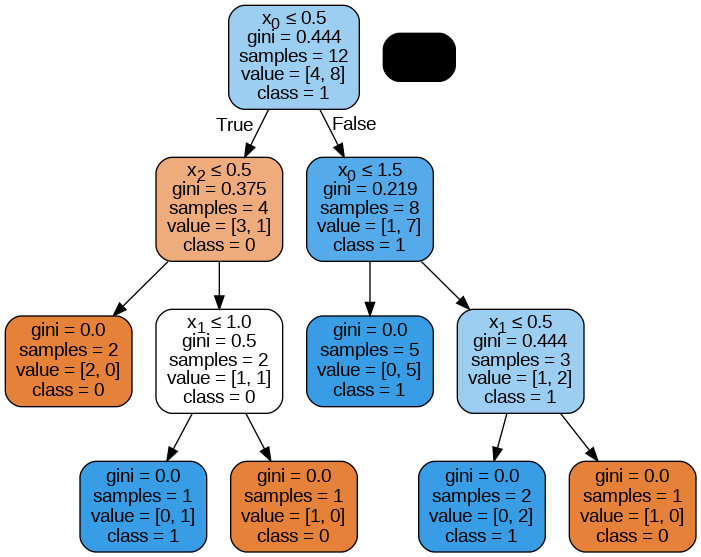

In [23]:
from IPython.display import Image
Image(graph.create_png())

In [36]:
model1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf1=model1.fit(x_train,y_train)
clf1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
model1.score(x,y)

0.9375

In [31]:
y_pred1=model1.predict(x_test)
abs1=metrics.accuracy_score(y_pred1,y_test)
abs1


0.75

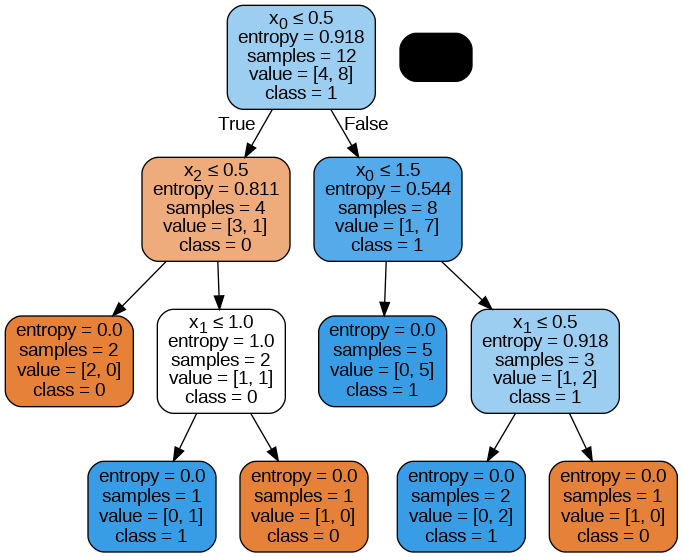

In [33]:
dot1=tree.export_graphviz(clf1,rounded=True,filled=True,special_characters=True,class_names=['0','1'])
graph1=pydotplus.graph_from_dot_data(dot1)
Image(graph1.create_png())